In [77]:
import pandas as pd

### Load in data

In [78]:
# Load the dataset
 
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

 
# Show the basic structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [79]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [80]:
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [81]:
df.duplicated().sum()

0

In [82]:
[print(f"{col} : {df[col].nunique()}") for col in df.select_dtypes(include="object").columns]

FILENAME : 235795
URL : 235370
Domain : 220086
TLD : 695
Title : 197874


[None, None, None, None, None]

In [84]:
df.dtypes[df.dtypes == 'object']


FILENAME    object
URL         object
Domain      object
TLD         object
Title       object
dtype: object

In [85]:
# numeric feature names 
num_feat = [col for col in df.select_dtypes(exclude='object').columns if df[col].nunique() > 2]
num_feat.sort()
num_feat

['CharContinuationRate',
 'DegitRatioInURL',
 'DomainLength',
 'DomainTitleMatchScore',
 'LargestLineLength',
 'LetterRatioInURL',
 'LineOfCode',
 'NoOfAmpersandInURL',
 'NoOfCSS',
 'NoOfDegitsInURL',
 'NoOfEmptyRef',
 'NoOfEqualsInURL',
 'NoOfExternalRef',
 'NoOfImage',
 'NoOfJS',
 'NoOfLettersInURL',
 'NoOfObfuscatedChar',
 'NoOfOtherSpecialCharsInURL',
 'NoOfPopup',
 'NoOfQMarkInURL',
 'NoOfSelfRef',
 'NoOfSubDomain',
 'NoOfiFrame',
 'ObfuscationRatio',
 'SpacialCharRatioInURL',
 'TLDLegitimateProb',
 'TLDLength',
 'URLCharProb',
 'URLLength',
 'URLSimilarityIndex',
 'URLTitleMatchScore']

In [86]:
#  binary (bi) numerical features
bi_feat = [col for col in df.select_dtypes(exclude='object').columns if df[col].nunique() == 2]
bi_feat.sort()
bi_feat

['Bank',
 'Crypto',
 'HasCopyrightInfo',
 'HasDescription',
 'HasExternalFormSubmit',
 'HasFavicon',
 'HasHiddenFields',
 'HasObfuscation',
 'HasPasswordField',
 'HasSocialNet',
 'HasSubmitButton',
 'HasTitle',
 'IsDomainIP',
 'IsHTTPS',
 'IsResponsive',
 'NoOfSelfRedirect',
 'NoOfURLRedirect',
 'Pay',
 'Robots',
 'label']

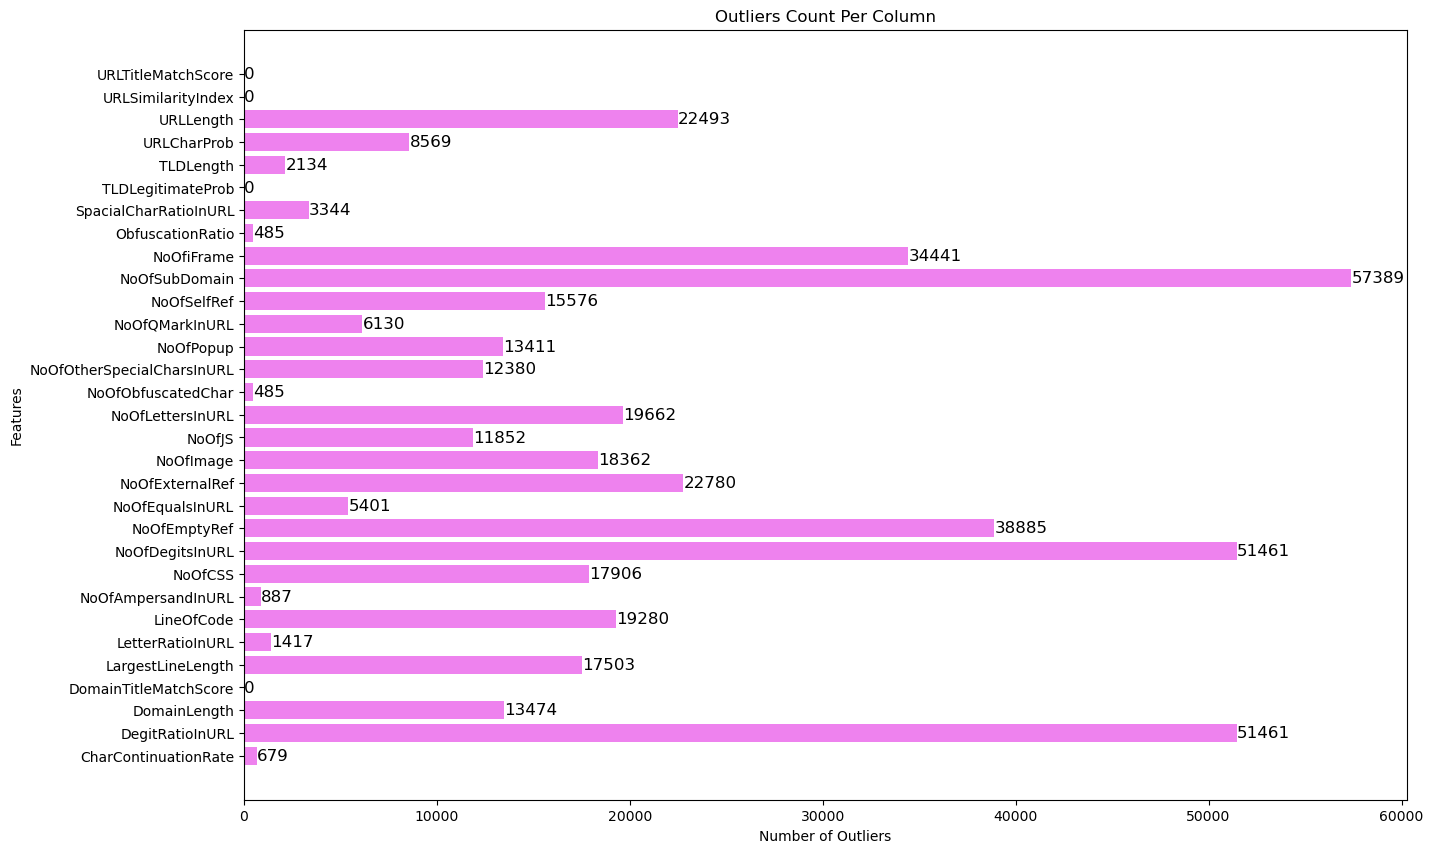

In [87]:
# Outliers detection
# Logistic Regression: linear decision
# XGBoost: this focuses on errors, no outliers cleaning may cause overfitting

outlier_counts = {}

for col in num_feat: 
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

cols = list(outlier_counts.keys())
counts = list(outlier_counts.values())

plt.figure(figsize=(15, 10))
bars = plt.barh(y=cols, width=counts, color='violet')  
plt.xlabel('Number of Outliers')
plt.ylabel('Features')
plt.title('Outliers Count Per Column')
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 6, bar.get_y() + bar.get_height()/2, str(count), va='center', fontsize=12)
plt.show()

In [88]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr(method='pearson')

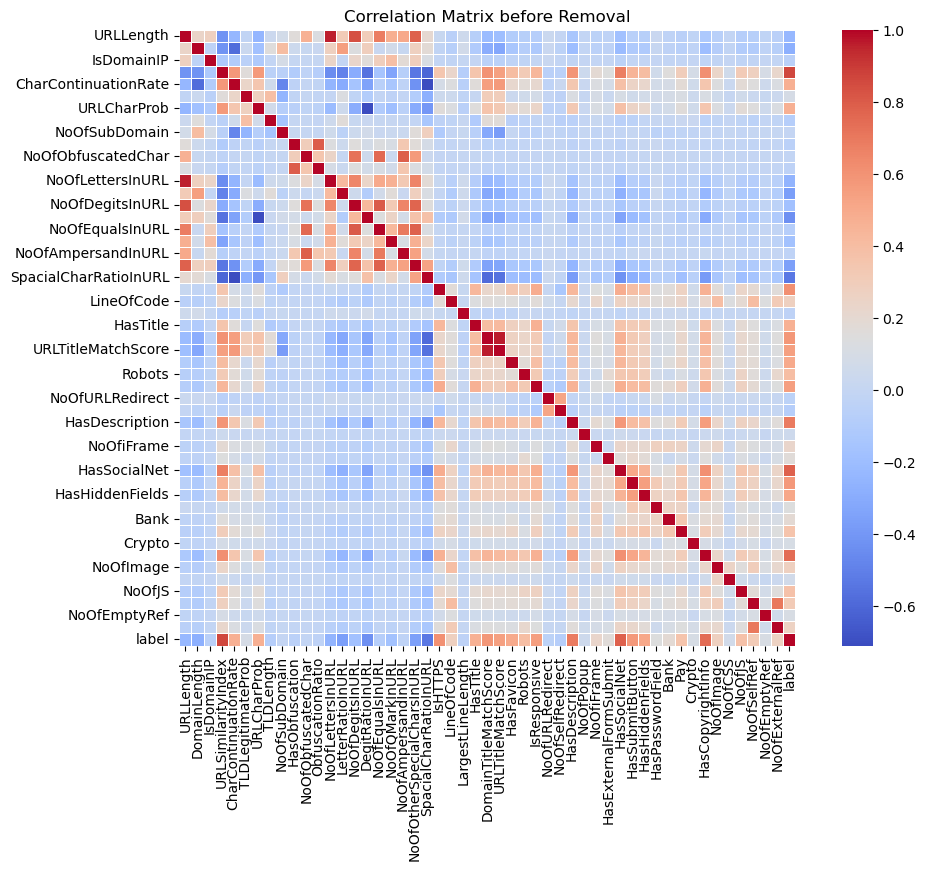

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix after removal
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix before Removal')
plt.savefig('Correlation Matrix before Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix before Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()

In [90]:
# Chi-square(Binary+categorical) test between categorical variables--test which featuresnassociated with taeget.

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'data'
# Iterate over each column in the DataFrame
for col in df.columns:
    contingency_table = pd.crosstab(df[col], df['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


Chi-square test for FILENAME:
Chi-square statistic: 235794.99999999997
P-value: 0.4990317742645193

Chi-square test for URL:
Chi-square statistic: 235795.00000000006
P-value: 0.26713702081407115

Chi-square test for URLLength:
Chi-square statistic: 67407.06168244261
P-value: 0.0

Chi-square test for Domain:
Chi-square statistic: 235682.3372966447
P-value: 3.972362509510112e-117

Chi-square test for DomainLength:
Chi-square statistic: 36976.8031780716
P-value: 0.0

Chi-square test for IsDomainIP:
Chi-square statistic: 852.260590396482
P-value: 2.3448225852057846e-187

Chi-square test for TLD:
Chi-square statistic: 72412.58849663034
P-value: 0.0

Chi-square test for URLSimilarityIndex:
Chi-square statistic: 232603.227390821
P-value: 0.0

Chi-square test for CharContinuationRate:
Chi-square statistic: 65322.87516163058
P-value: 0.0

Chi-square test for TLDLegitimateProb:
Chi-square statistic: 71998.95018702387
P-value: 0.0

Chi-square test for URLCharProb:
Chi-square statistic: 234441.345

In [91]:
# Removing highly and super weakly correlated features using a correlation matrix
# Step 1: Keep only numeric columns
df_numeric = df.select_dtypes(include='number')

# Step 2: Drop highly correlated features (correlation > 0.7)
correlation_matrix = df_numeric.corr(method='pearson')
threshold = 0.7

print("Removed highly correlated features:")
correlated_features = set()

for _ in range(4):  # Iterative pruning
    correlation_matrix = df_numeric.corr(method='pearson').abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if i != j and correlation_matrix.iloc[i, j] > threshold:
                colname = correlation_matrix.columns[i]
                if colname != "label":
                    correlated_features.add(colname)
                    print(colname)
    df_numeric = df_numeric.drop(columns=[col for col in correlated_features if col in df_numeric.columns])

# Save version after removing high correlations
df_DH = df_numeric.copy()

# Step 3: Drop features with low correlation (< 0.2) with the target
target_corr = df_DH.corr()['label'].abs()
low_corr_features = target_corr[target_corr < 0.2].index.tolist()
 

df_DL = df_DH.drop(columns=low_corr_features)

print("\nRemoved features with low correlation to label:")
print(low_corr_features)


Removed highly correlated features:
ObfuscationRatio
NoOfLettersInURL
NoOfDegitsInURL
NoOfDegitsInURL
DegitRatioInURL
NoOfEqualsInURL
NoOfEqualsInURL
NoOfAmpersandInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
SpacialCharRatioInURL
URLTitleMatchScore
NoOfExternalRef

Removed features with low correlation to label:
['IsDomainIP', 'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'NoOfQMarkInURL', 'LargestLineLength', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Crypto', 'NoOfCSS', 'NoOfEmptyRef']


In [92]:
df_DL.head()

,URLLength,DomainLength,URLSimilarityIndex,CharContinuationRate,URLCharProb,LetterRatioInURL,IsHTTPS,LineOfCode,HasTitle,DomainTitleMatchScore,...,NoOfiFrame,HasSocialNet,HasSubmitButton,HasHiddenFields,Pay,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
0,31,24,100.0,1.000000,0.061933,0.581,1,558,1,0.000000,...,1,0,1,1,0,1,34,28,119,1
1,23,16,100.0,0.666667,0.050207,0.391,1,618,1,55.555556,...,0,1,1,0,0,1,50,8,39,1
2,29,22,100.0,0.866667,0.064129,0.517,1,467,1,46.666667,...,0,0,1,1,0,1,10,7,42,1
3,26,19,100.0,1.000000,0.057606,0.500,1,6356,1,0.000000,...,12,1,1,1,1,1,3,15,22,1
4,33,26,100.0,1.000000,0.059441,0.606,1,6089,1,100.000000,...,2,1,1,1,1,1,244,34,72,1


In [93]:
df_DL.shape

(235795, 24)

In [94]:
df_DL.describe()

,URLLength,DomainLength,URLSimilarityIndex,CharContinuationRate,URLCharProb,LetterRatioInURL,IsHTTPS,LineOfCode,HasTitle,DomainTitleMatchScore,...,NoOfiFrame,HasSocialNet,HasSubmitButton,HasHiddenFields,Pay,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,78.430778,0.845508,0.055747,0.515946,0.782625,1141.900443,0.861261,50.131427,...,1.588638,0.456570,0.414301,0.377799,0.237007,0.486775,26.075689,10.522305,65.071113,0.571895
std,41.314153,9.150793,28.976055,0.216632,0.010587,0.123315,0.412461,3419.950513,0.345675,49.676981,...,5.762561,0.498111,0.492602,0.484838,0.425247,0.499826,79.411815,22.312192,176.687539,0.494805
min,13.000000,4.000000,0.155574,0.000000,0.001083,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,57.024793,0.680000,0.050747,0.435000,1.000000,18.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,20.000000,100.000000,1.000000,0.057970,0.519000,1.000000,429.000000,1.000000,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,12.000000,1.000000
75%,34.000000,24.000000,100.000000,1.000000,0.062875,0.594000,1.000000,1277.000000,1.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,29.000000,15.000000,88.000000,1.000000
max,6097.000000,110.000000,100.000000,1.000000,0.090824,0.926000,1.000000,442666.000000,1.000000,100.000000,...,1602.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8956.000000,6957.000000,27397.000000,1.000000


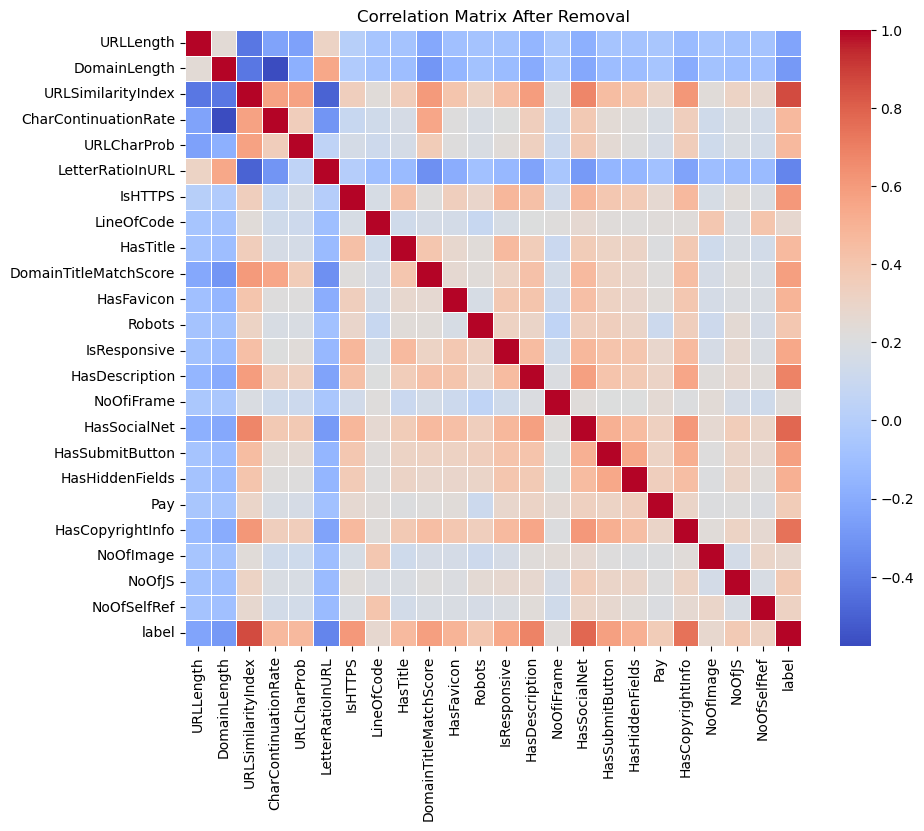

In [95]:
correlation_matrix_after = df_DL.corr()
# Plot the correlation matrix after removal
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix After Removal')
plt.savefig('Correlation Matrix After Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix After Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()

In [96]:
binary_cols = [col for col in df.columns 
               if set(df[col].dropna().unique()).issubset({0, 1})]
print("Binary columns with only 0/1 values:")
print(binary_cols)

Binary columns with only 0/1 values:
['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'label']


In [97]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
for col in binary_cols:
    ratio = df[col].value_counts(normalize=True).max()
    if ratio > 0.80:  #  more than 60% of rows are the same
        print(f"'{col}' is severely imbalanced: {ratio:.2%}")
# Based on the chi-sqaure value, we keep all of them

'IsDomainIP' is severely imbalanced: 99.73%
'HasObfuscation' is severely imbalanced: 99.79%
'HasTitle' is severely imbalanced: 86.13%
'NoOfURLRedirect' is severely imbalanced: 86.66%
'NoOfSelfRedirect' is severely imbalanced: 95.99%
'HasExternalFormSubmit' is severely imbalanced: 95.60%
'HasPasswordField' is severely imbalanced: 89.77%
'Bank' is severely imbalanced: 87.29%
'Crypto' is severely imbalanced: 97.65%


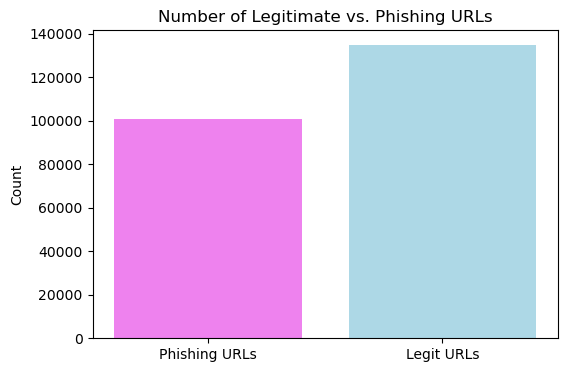

In [98]:
label_counts = df["label"].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=['lightblue', 'violet'])
plt.xticks([1, 0], ["Legit URLs", "Phishing URLs"])
plt.ylabel("Count")
plt.title("Number of Legitimate vs. Phishing URLs")
plt.show()

In [99]:
## more than 99% of values are the same - drop
near_constant = []

for col in df.columns:
    top_freq_ratio = df[col].value_counts(normalize=True).max()
    if top_freq_ratio > 0.99:
        near_constant.append((col, top_freq_ratio))

# Show sorted results
import pandas as pd
pd.DataFrame(near_constant, columns=["Feature", "Dominant Value Ratio"]).sort_values("Dominant Value Ratio", ascending=False)


,Feature,Dominant Value Ratio
1,HasObfuscation,0.997943
2,NoOfObfuscatedChar,0.997943
3,ObfuscationRatio,0.997943
0,IsDomainIP,0.997294
4,NoOfAmpersandInURL,0.996238


In [100]:
# Check variance for numeric features
df.select_dtypes(include='number').var().sort_values()

# Features with very low values have almost no variation
# Drop:
# ObfuscationRatio              0.0000146
# URLCharProb                   0.000112
# SpacialCharRatioInURL         0.00105
# DegitRatioInURL               0.00502

ObfuscationRatio              1.457109e-05
URLCharProb                   1.120862e-04
SpacialCharRatioInURL         1.049305e-03
HasObfuscation                2.052649e-03
IsDomainIP                    2.698431e-03
DegitRatioInURL               5.026428e-03
LetterRatioInURL              1.520651e-02
Crypto                        2.292286e-02
NoOfQMarkInURL                3.744434e-02
NoOfSelfRedirect              3.849847e-02
HasExternalFormSubmit         4.205265e-02
CharContinuationRate          4.692961e-02
TLDLegitimateProb             6.331677e-02
HasPasswordField              9.180532e-02
Bank                          1.109380e-01
NoOfURLRedirect               1.156327e-01
HasTitle                      1.194911e-01
IsHTTPS                       1.701240e-01
Pay                           1.808353e-01
Robots                        1.954977e-01
HasFavicon                    2.308928e-01
IsResponsive                  2.344976e-01
HasHiddenFields               2.350678e-01
HasSubmitBu

Unique values: 36360
Most frequent value ratio: 0.5752284823681588


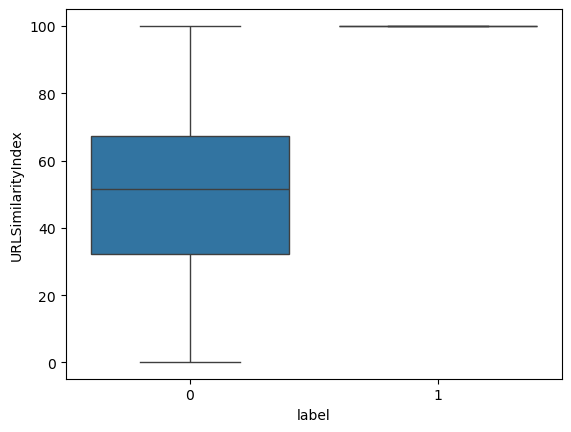

In [101]:
# Visual: boxplot
sns.boxplot(data=df, x='label', y='URLSimilarityIndex')

# Numeric: variability check
print("Unique values:", df['URLSimilarityIndex'].nunique())
print("Most frequent value ratio:", df['URLSimilarityIndex'].value_counts(normalize=True).iloc[0])
# It’s uninformative across classes 

In [102]:
existing_features_to_drop = [
    #  Highly Correlated
    'ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL',
    'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
    'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL',
    'URLTitleMatchScore', 'NoOfExternalRef',

    #  Low Label Correlation (Chi² / corr)
    'IsDomainIP', 'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain',
    'HasObfuscation', 'NoOfObfuscatedChar', 'NoOfQMarkInURL',
    'LargestLineLength', 'NoOfPopup', 'HasExternalFormSubmit',
    'HasPasswordField', 'Bank', 'Crypto', 'NoOfCSS', 'NoOfEmptyRef',

    #  Low Variance / Dominant
    'ObfuscationRatio', 'NoOfObfuscatedChar', 'NoOfAmpersandInURL', 
]


In [103]:
# Drop only those columns that still exist in df
existing_features_to_drop = [col for col in features_to_drop if col in df.columns]
df_cleaned = df.drop(columns=existing_features_to_drop)


In [104]:
df_cleaned.head()

,FILENAME,URL,URLLength,Domain,DomainLength,TLD,URLSimilarityIndex,CharContinuationRate,URLCharProb,LetterRatioInURL,...,NoOfiFrame,HasSocialNet,HasSubmitButton,HasHiddenFields,Pay,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,com,100.0,1.000000,0.061933,0.581,...,1,0,1,1,0,1,34,28,119,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,de,100.0,0.666667,0.050207,0.391,...,0,1,1,0,0,1,50,8,39,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,uk,100.0,0.866667,0.064129,0.517,...,0,0,1,1,0,1,10,7,42,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,com,100.0,1.000000,0.057606,0.500,...,12,1,1,1,1,1,3,15,22,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,org,100.0,1.000000,0.059441,0.606,...,2,1,1,1,1,1,244,34,72,1


In [107]:
df = df_cleaned.drop(columns=['URLSimilarityIndex','TLD','Domain','URL','FILENAME','Title'])


In [108]:
df.head()

,URLLength,DomainLength,CharContinuationRate,URLCharProb,LetterRatioInURL,IsHTTPS,LineOfCode,HasTitle,DomainTitleMatchScore,HasFavicon,...,NoOfiFrame,HasSocialNet,HasSubmitButton,HasHiddenFields,Pay,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
0,31,24,1.000000,0.061933,0.581,1,558,1,0.000000,0,...,1,0,1,1,0,1,34,28,119,1
1,23,16,0.666667,0.050207,0.391,1,618,1,55.555556,1,...,0,1,1,0,0,1,50,8,39,1
2,29,22,0.866667,0.064129,0.517,1,467,1,46.666667,0,...,0,0,1,1,0,1,10,7,42,1
3,26,19,1.000000,0.057606,0.500,1,6356,1,0.000000,0,...,12,1,1,1,1,1,3,15,22,1
4,33,26,1.000000,0.059441,0.606,1,6089,1,100.000000,0,...,2,1,1,1,1,1,244,34,72,1


# EDA

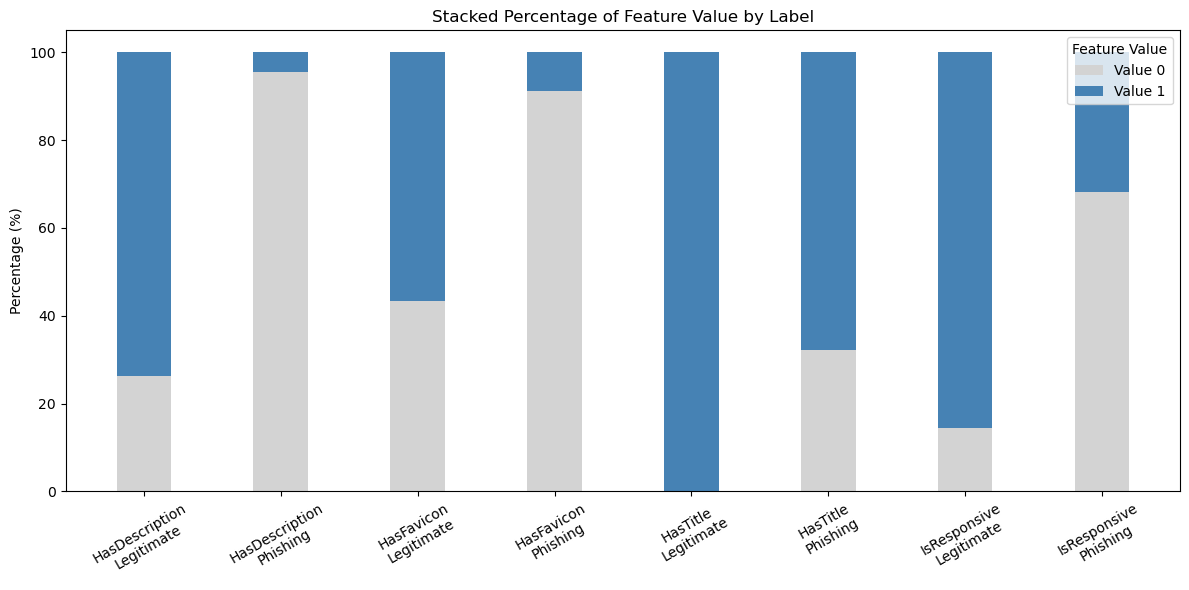

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your features and label mapping
features = ["HasTitle", "HasDescription", "HasFavicon", "IsResponsive"]
labels_map = {0: "Phishing", 1: "Legitimate"}

# Prepare data
plot_data = []

for feature in features:
    for label in [0, 1]:
        total = df[df["label"] == label].shape[0]
        count_1 = df[(df["label"] == label) & (df[feature] == 1)].shape[0]
        count_0 = total - count_1

        percent_1 = count_1 / total * 100
        percent_0 = count_0 / total * 100

        plot_data.append({"Feature": feature, "Label": labels_map[label], "Value": "1", "Percent": percent_1})
        plot_data.append({"Feature": feature, "Label": labels_map[label], "Value": "0", "Percent": percent_0})

bar_df = pd.DataFrame(plot_data)

# Pivot for stacked bar plotting
pivot_df = bar_df.pivot(index=["Feature", "Label"], columns="Value", values="Percent").reset_index()

# Plot stacked bars
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4
x = range(len(pivot_df))

# Stacking order: value = 0 at bottom, value = 1 on top
bar0 = ax.bar(x, pivot_df["0"], width, label='Value 0', color='lightgray')
bar1 = ax.bar(x, pivot_df["1"], width, bottom=pivot_df["0"], label='Value 1', color='steelblue')

# Custom x-tick labels with multiline Feature + Label
ax.set_xticks(x)
ax.set_xticklabels([f"{f}\n{l}" for f, l in zip(pivot_df['Feature'], pivot_df['Label'])], rotation=30)
ax.set_ylabel("Percentage (%)")
ax.set_title("Stacked Percentage of Feature Value by Label")
ax.legend(title="Feature Value")

plt.tight_layout()
plt.show()

# All of them are strong indicators
# HasDescription, HasTitle, and IsResponsive are strong discriminators — keep them for modeling
# Visual differences between phishing and legitimate are often related to basic HTML structure 

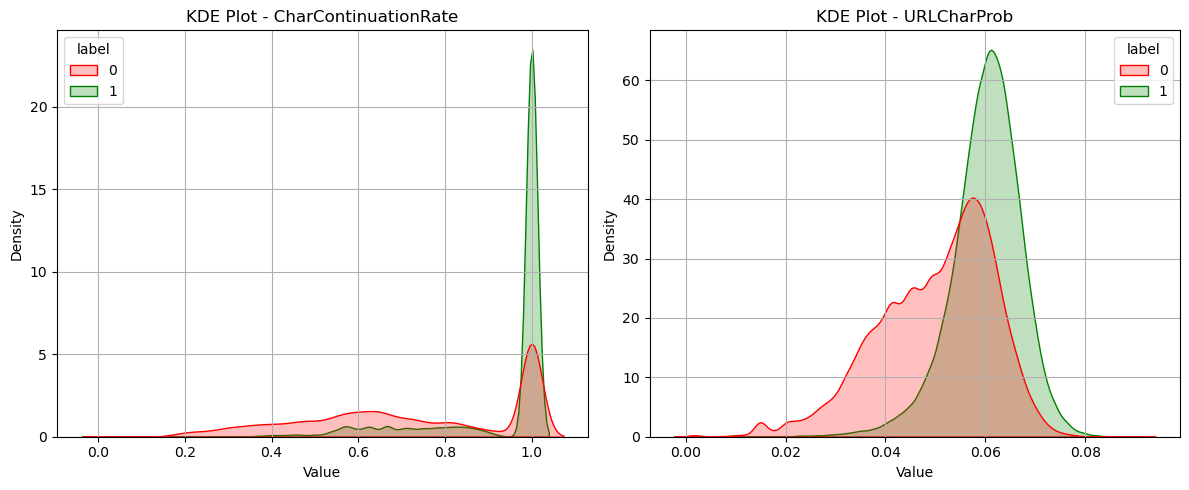

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["CharContinuationRate", "URLCharProb"]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data=df, x=feature, hue="label", fill=True, palette={1: "green", 0: "red"}, common_norm=False)
    plt.title(f"KDE Plot - {feature}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid()

plt.tight_layout()
plt.show()

# URLCharProb is also discriminative, but the difference is less sharp than CharContinuationRate

# Still useful, especially in combination with other character-based features


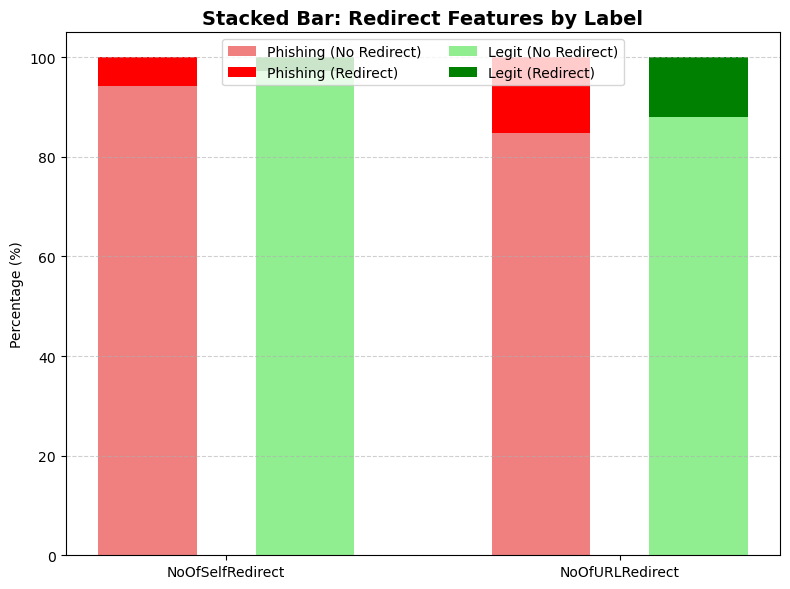

In [113]:
# compare behavioral traits between the two classes

import matplotlib.pyplot as plt
import numpy as np

# Your features
features = ["NoOfSelfRedirect", "NoOfURLRedirect"]

# Calculate the percentage of 1s (redirect present)
percent_legit = [df[df["label"] == 1][f].mean() * 100 for f in features]
percent_phish = [df[df["label"] == 0][f].mean() * 100 for f in features]

# Calculate the percentage of 0s (redirect absent)
percent_legit_0 = [100 - p for p in percent_legit]
percent_phish_0 = [100 - p for p in percent_phish]

# Plot
x = np.arange(len(features))
bar_width = 0.5

fig, ax = plt.subplots(figsize=(8, 6))

# Stack bar: Phishing
ax.bar(x - 0.2, percent_phish_0, bar_width/2, label='Phishing (No Redirect)', color='lightcoral')
ax.bar(x - 0.2, percent_phish, bar_width/2, bottom=percent_phish_0, label='Phishing (Redirect)', color='red')

# Stack bar: Legitimate
ax.bar(x + 0.2, percent_legit_0, bar_width/2, label='Legit (No Redirect)', color='lightgreen')
ax.bar(x + 0.2, percent_legit, bar_width/2, bottom=percent_legit_0, label='Legit (Redirect)', color='green')

# Aesthetics
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.set_ylabel("Percentage (%)")
ax.set_title("Stacked Bar: Redirect Features by Label", fontsize=14, weight='bold')
ax.legend(loc='upper center', ncol=2)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# NoOfURLRedirect may provide some signal, though it’s not a strong separator on its own

# NoOfSelfRedirect shows minimal discriminative power and may not be very helpful in your model



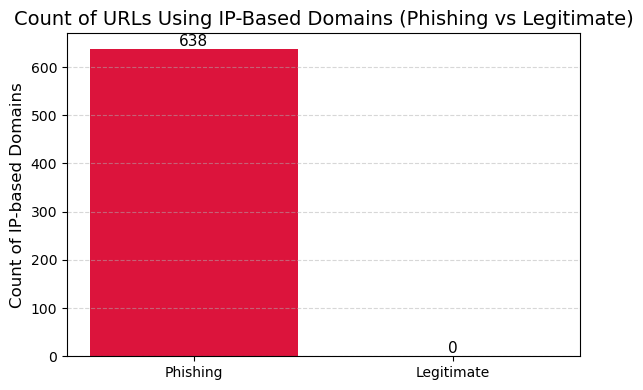

In [126]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
 
counts = [
    len(df[(df["label"] == 0) & (df["IsDomainIP"] == 1)]), 
    len(df[(df["label"] == 1) & (df["IsDomainIP"] == 1)])   
]

labels = ["Phishing", "Legitimate"]
colors = ['crimson', 'seagreen']

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=colors)

# Annotate count on each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 0),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=11)

plt.ylabel("Count of IP-based Domains", fontsize=12)
plt.title("Count of URLs Using IP-Based Domains (Phishing vs Legitimate)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Phishing URLs (label = 0): 638 used IP-based domains -- strong indicator for phishing url

# Legitimate URLs (label = 1): 0 used IP-based domains

# test it out in logitic regression, see how it works

In [117]:
# Based on the graph i just generated, check skewness and outliers,interpret business meaning,log-transform(logistic regression)

# step 1 :Identify Numeric Columns with High Skew
from numpy import log1p

# Select only numeric columns (excluding label if needed)
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('label', errors='ignore')

# Calculate skewness
skewed = df[numeric_cols].skew().sort_values(ascending=False)

# Define threshold for strong skew
skew_threshold = 1.0
skewed_cols = skewed[skewed > skew_threshold].index.tolist()

print(f"Columns to log-transform: {skewed_cols}")


Columns to log-transform: ['NoOfJS', 'NoOfiFrame', 'NoOfSelfRef', 'URLLength', 'LineOfCode', 'NoOfImage', 'NoOfSelfRedirect', 'DomainLength', 'NoOfURLRedirect', 'Pay', 'Robots']


In [118]:
# step 2:Apply Log Transform
# Apply log1p (log(x+1)) to avoid issues with 0s
for col in skewed_cols:
    df[f'{col}_log'] = log1p(df[col])


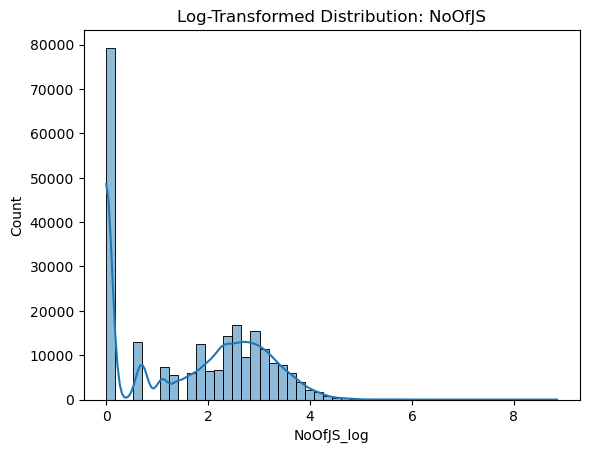

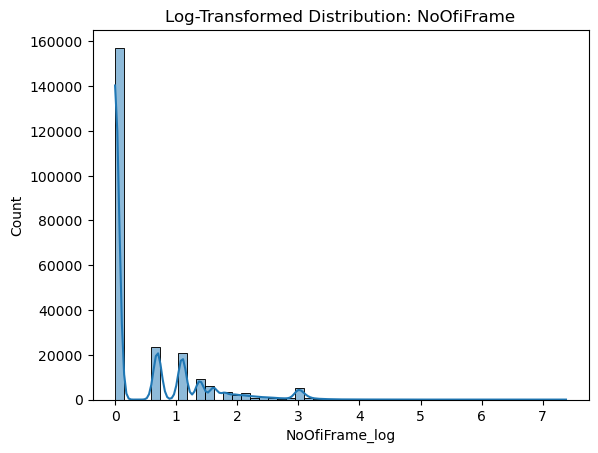

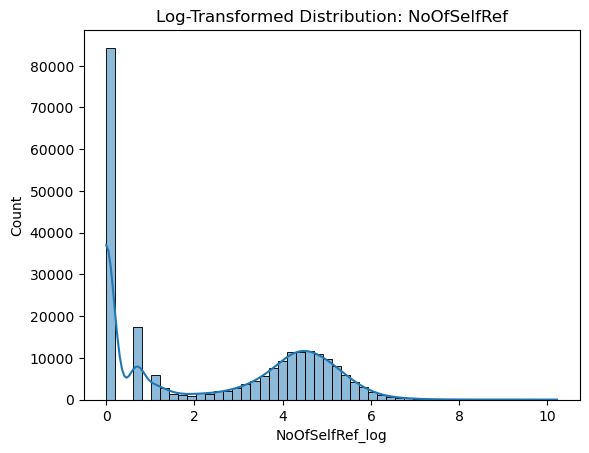

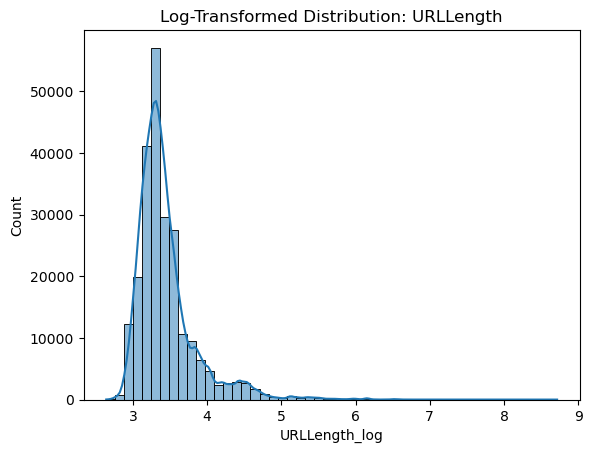

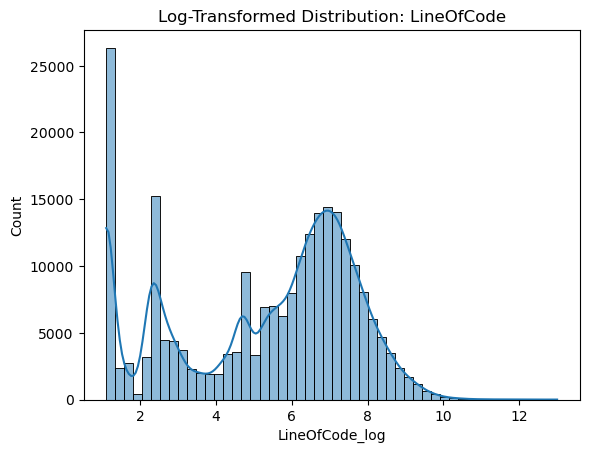

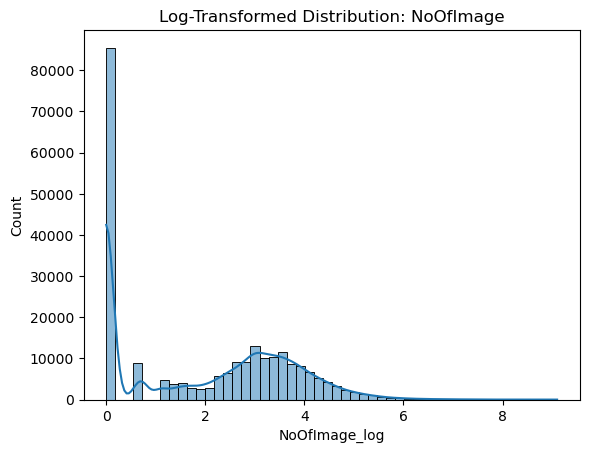

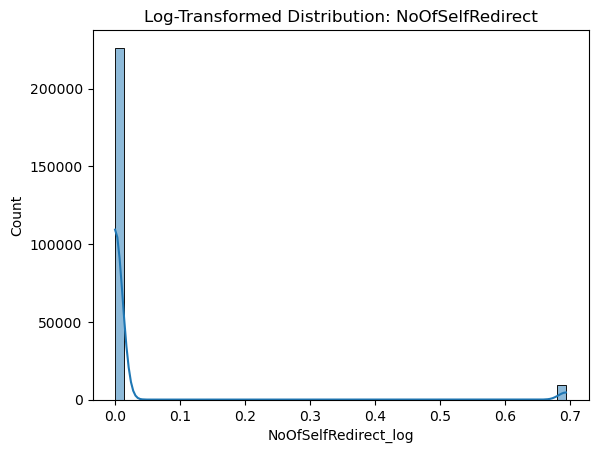

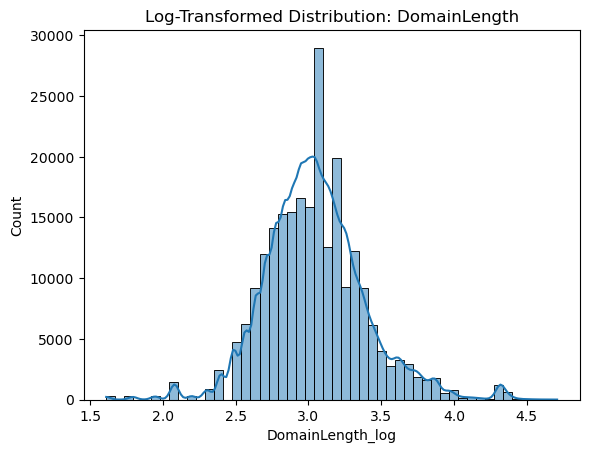

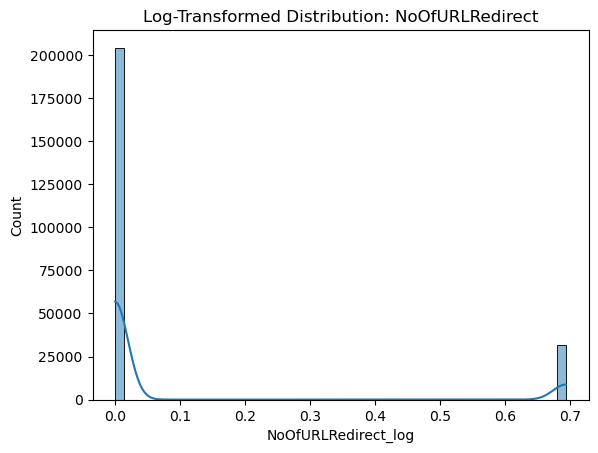

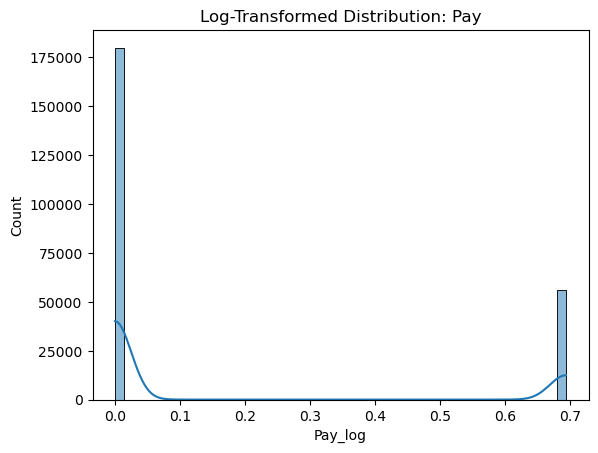

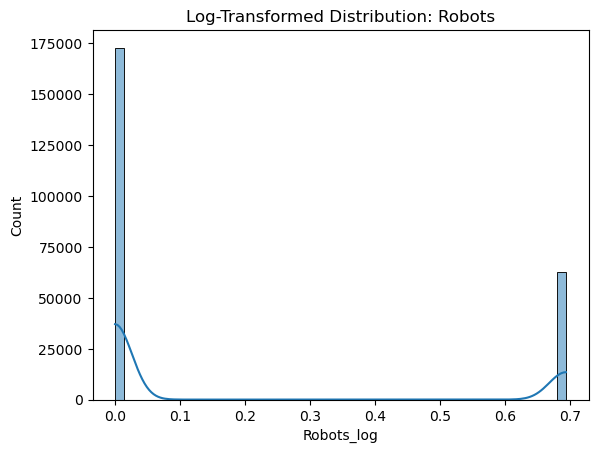

In [119]:
for col in skewed_cols:
    sns.histplot(df[f'{col}_log'], bins=50, kde=True)
    plt.title(f'Log-Transformed Distribution: {col}')
    plt.show()
# why use log-transform: Normalize to help models that assume or benefit from normality (linear regression or distance-based models) This should apply to numeric data not binary or categorical data

C:\Users\user.DESKTOP-QJ387K9\AppData\Local\Temp\ipykernel_8872\2158434090.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="label", y=col, palette="Set2", inner="quartile")
C:\Users\user.DESKTOP-QJ387K9\AppData\Local\Temp\ipykernel_8872\2158434090.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="label", y=col, palette="Set2", inner="quartile")
C:\Users\user.DESKTOP-QJ387K9\AppData\Local\Temp\ipykernel_8872\2158434090.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="label", y=col, palette=

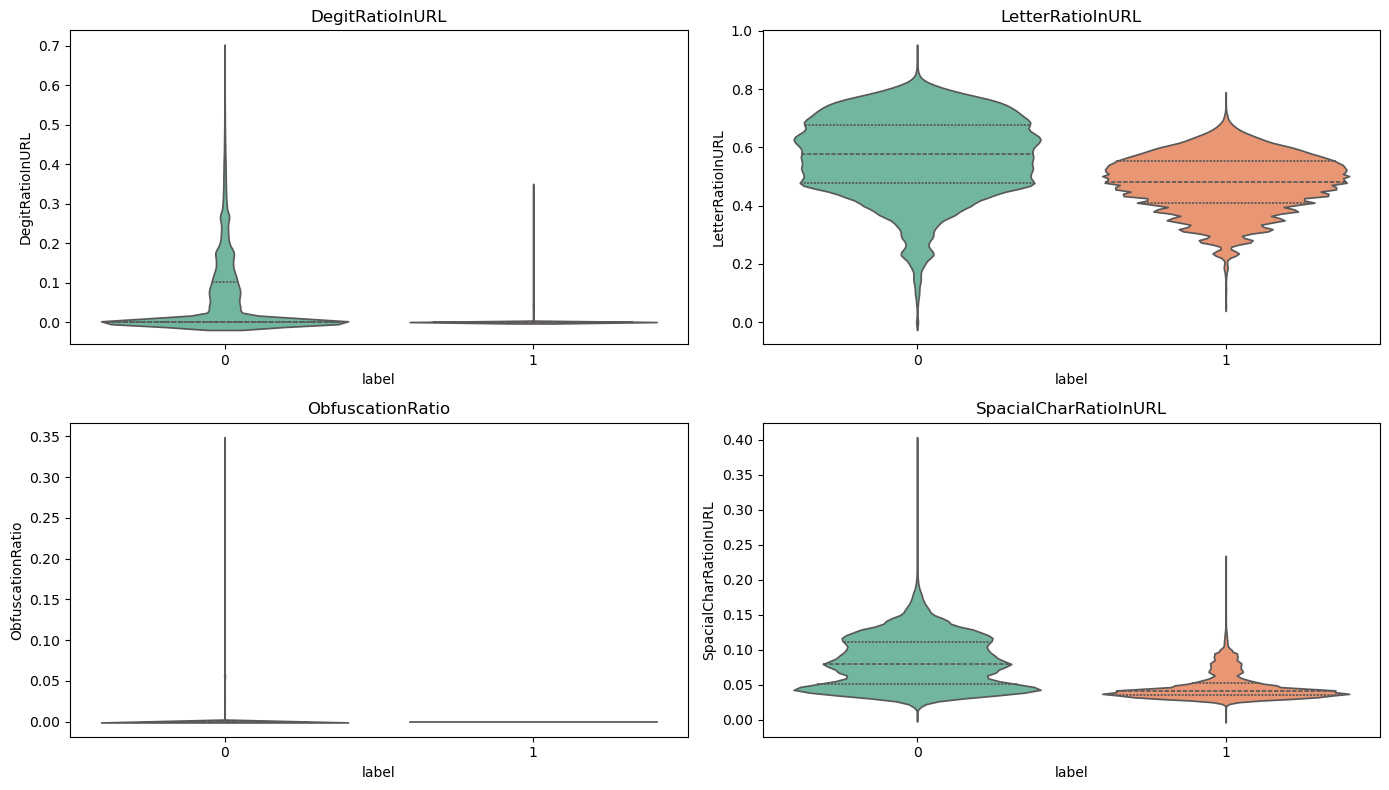

In [131]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
for i, col in enumerate(["DegitRatioInURL", "LetterRatioInURL", "ObfuscationRatio", "SpacialCharRatioInURL"]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, x="label", y=col, palette="Set2", inner="quartile")
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

# Those all can be used in decison tree models but after calculte the correlation, they can not be used.

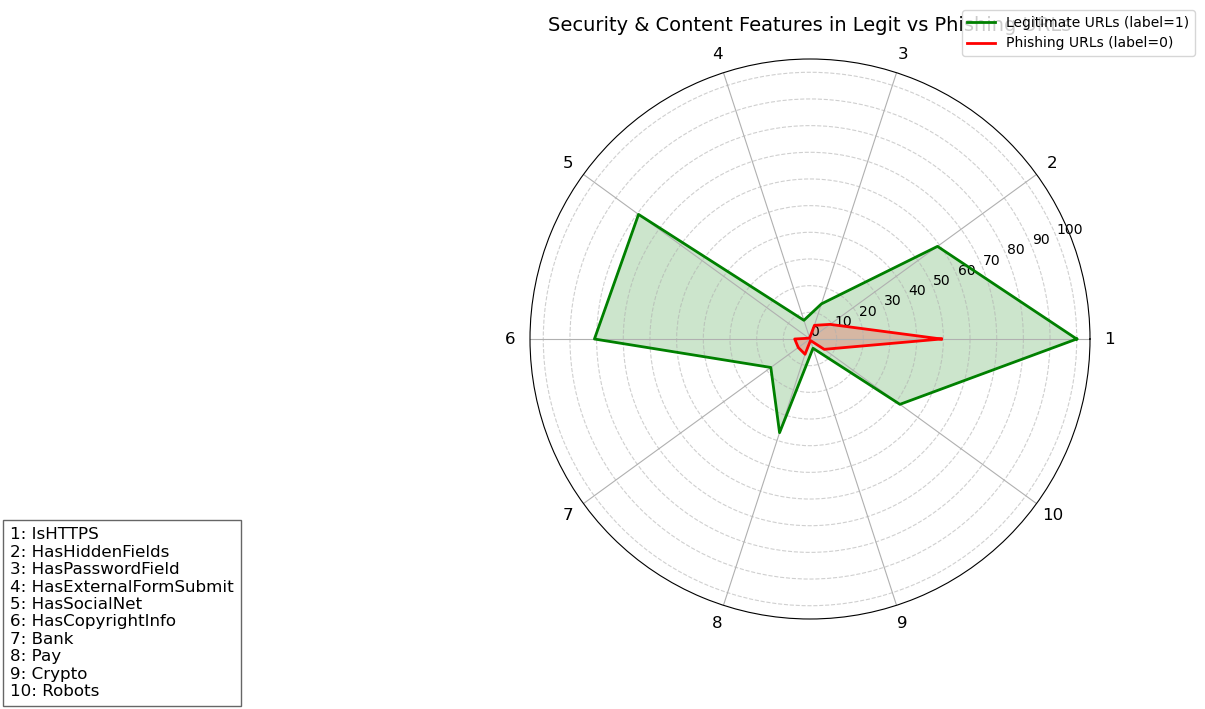

In [132]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
legit_urls = df[df["label"] == 1]
phish_urls = df[df["label"] == 0]

metrics_legit = {
    "IsHTTPS": legit_urls["IsHTTPS"].mean() * 100,
    "HasHiddenFields": legit_urls["HasHiddenFields"].mean() * 100,
    "HasPasswordField": legit_urls["HasPasswordField"].mean() * 100,
    "HasExternalFormSubmit": legit_urls["HasExternalFormSubmit"].mean() * 100,
    "HasSocialNet": legit_urls["HasSocialNet"].mean() * 100,
    "HasCopyrightInfo": legit_urls["HasCopyrightInfo"].mean() * 100,
    "Bank": legit_urls["Bank"].mean() * 100,
    "Pay": legit_urls["Pay"].mean() * 100,
    "Crypto": legit_urls["Crypto"].mean() * 100,
    "Robots": legit_urls["Robots"].mean() * 100
}

metrics_phish = {
    "IsHTTPS": phish_urls["IsHTTPS"].mean() * 100,
    "HasHiddenFields": phish_urls["HasHiddenFields"].mean() * 100,
    "HasPasswordField": phish_urls["HasPasswordField"].mean() * 100,
    "HasExternalFormSubmit": phish_urls["HasExternalFormSubmit"].mean() * 100,
    "HasSocialNet": phish_urls["HasSocialNet"].mean() * 100,
    "HasCopyrightInfo": phish_urls["HasCopyrightInfo"].mean() * 100,
    "Bank": phish_urls["Bank"].mean() * 100,
    "Pay": phish_urls["Pay"].mean() * 100,
    "Crypto": phish_urls["Crypto"].mean() * 100,
    "Robots": phish_urls["Robots"].mean() * 100
}

feature_mapping = {i+1: feature for i, feature in enumerate(metrics_legit.keys())}
categories = list(feature_mapping.keys()) 
labels = list(metrics_legit.keys())

values_legit = list(metrics_legit.values())
values_phish = list(metrics_phish.values())
num_vars = len(categories)

import numpy as np
import matplotlib.pyplot as plt

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values_legit += values_legit[:1]
values_phish += values_phish[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values_legit, linewidth=2, linestyle='solid', color="green", label="Legitimate URLs (label=1)")
ax.fill(angles, values_legit, alpha=0.2, color="green")
ax.plot(angles, values_phish, linewidth=2, linestyle='solid', color="red", label="Phishing URLs (label=0)")
ax.fill(angles, values_phish, alpha=0.2, color="red")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels([str(i) for i in range(0, 101, 10)], fontsize=10)
ax.yaxis.grid(True, linestyle="--", alpha=0.6)

# Title and legend
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.title("Security & Content Features in Legit vs Phishing URLs", fontsize=14, pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
legend_text = "\n".join([f"{k}: {v}" for k, v in feature_mapping.items()])
plt.figtext(0.1, 0.05, legend_text, fontsize=12, va="bottom", ha="left",
            bbox={"facecolor": "white", "alpha": 0.6, "pad": 5})
plt.show()

# legitimate URLs (green area) are much more likely to contain key security and content features

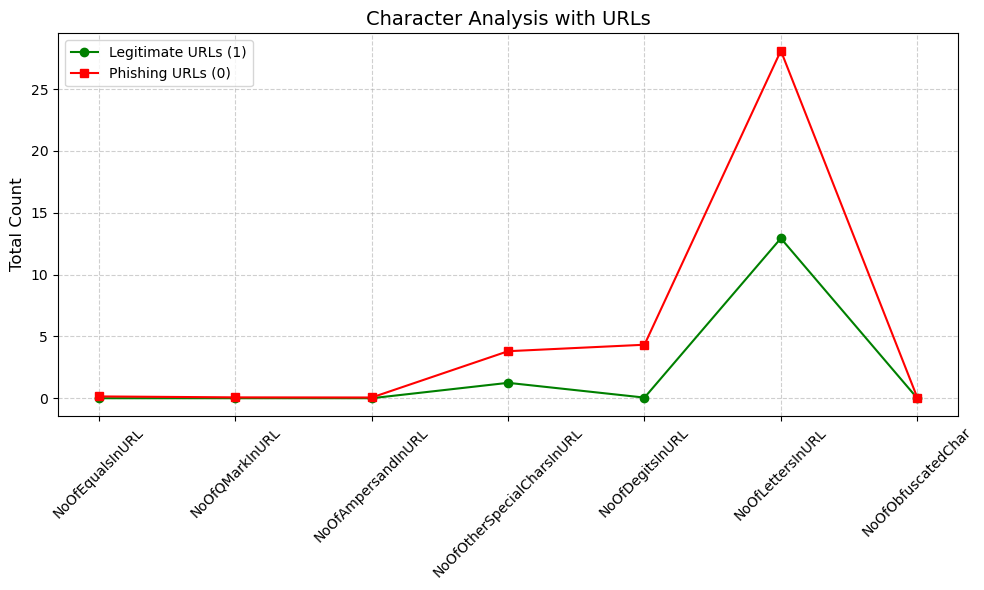

In [135]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
features = [
    "NoOfEqualsInURL", "NoOfQMarkInURL", "NoOfAmpersandInURL", "NoOfOtherSpecialCharsInURL", "NoOfDegitsInURL", "NoOfLettersInURL",
    "NoOfObfuscatedChar"
]

legit_counts =df[df["label"] == 1][features].mean() 
phish_counts = df[df["label"] == 0][features].mean()  
x = np.arange(len(features))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, legit_counts, marker='o', linestyle='-', color='green', label="Legitimate URLs (1)")
ax.plot(x, phish_counts, marker='s', linestyle='-', color='red', label="Phishing URLs (0)")
ax.set_ylabel("Total Count", fontsize=12)
ax.set_title("Character Analysis with URLs", fontsize=14)

ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, fontsize=10)  

ax.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# DROP: NoOfEqualsInURL, NoOfQMarkInURL, NoOfAmpersandInURL,NoOfObfuscatedChar

C:\Users\user.DESKTOP-QJ387K9\AppData\Local\Temp\ipykernel_8872\383464053.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\user.DESKTOP-QJ387K9\AppData\Local\Temp\ipykernel_8872\383464053.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Phishing', 'Legit'])
C:\Users\user.DESKTOP-QJ387K9\AppData\Local\Temp\ipykernel_8872\383464053.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\user.DESKTOP-QJ387K9\AppData\Local\Temp\ipykernel_8872\383464053.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

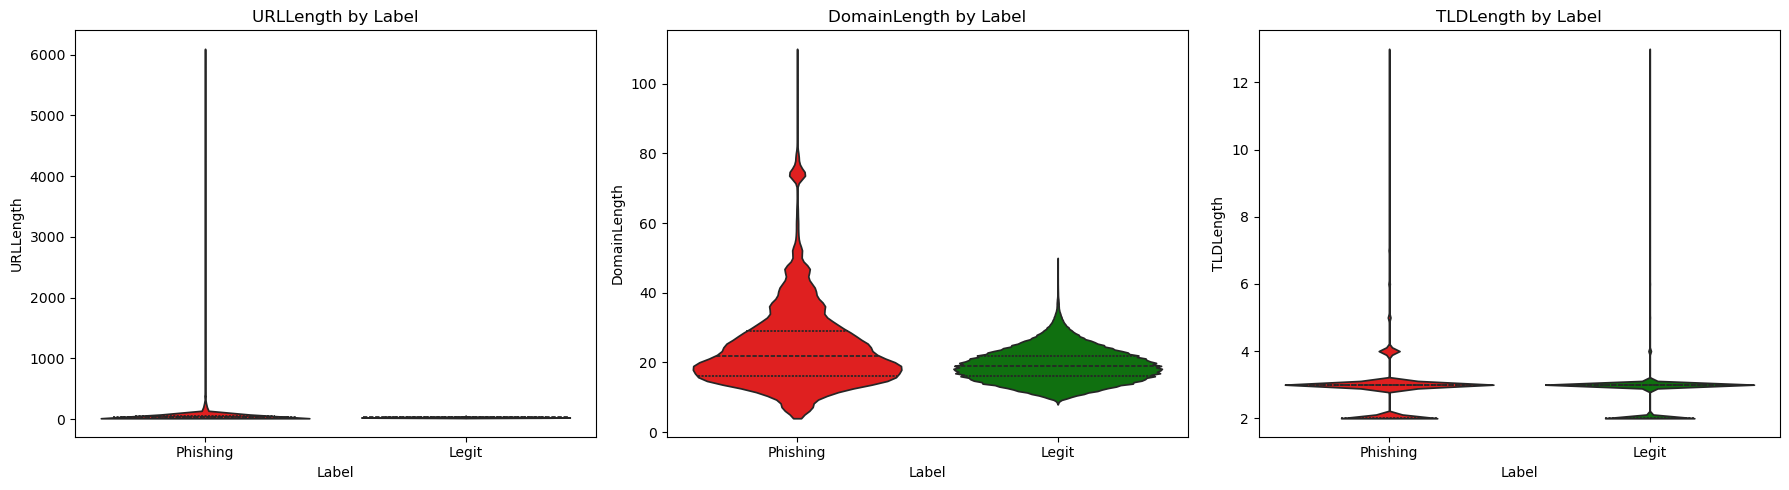

In [139]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
palette = {'0': 'red', '1': 'green'}  # match string keys

features = ["URLLength", "DomainLength", "TLDLength"]

fig, axes = plt.subplots(1, len(features), figsize=(18, 5))

for i, feature in enumerate(features):
    sns.violinplot(
        data=df,
        x='label',
        y=feature,
        palette={'0': 'red', '1': 'green'},  # string keys
        ax=axes[i],
        inner='quartile',
        cut=0
    )
    axes[i].set_xticklabels(['Phishing', 'Legit'])
    axes[i].set_title(f'{feature} by Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

#  URLLength: Consider log-transforming to reduce skew
#  DomainLength: Good for identifying fake/spoof domains
#  TLDLength:	Useful when paired with TLD type-remove

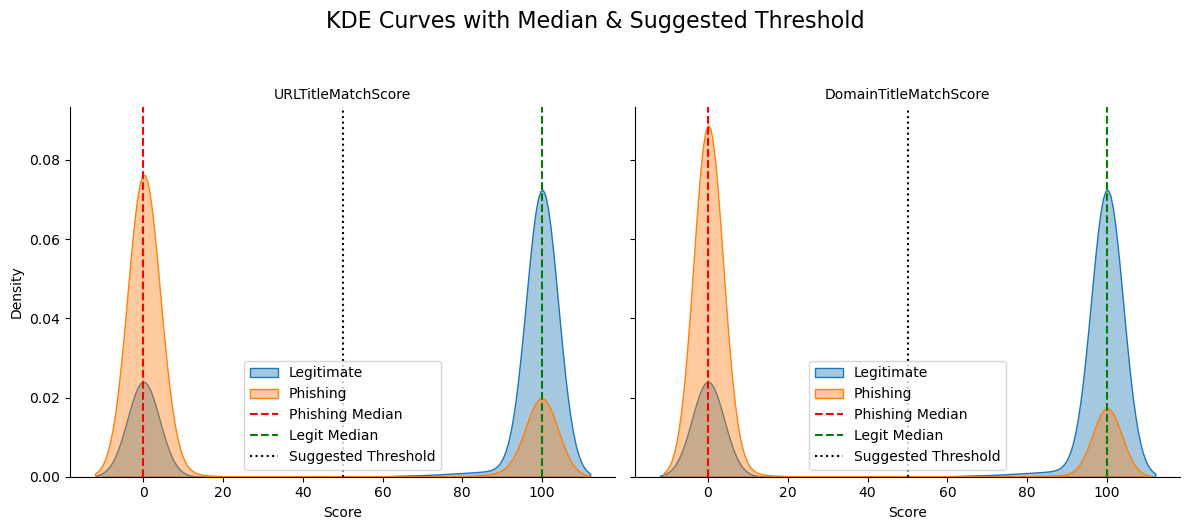

In [142]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare long-form data
df_melted = df.melt(id_vars='label', value_vars=["URLTitleMatchScore", "DomainTitleMatchScore"],
                    var_name='Feature', value_name='Score')
df_melted['label'] = df_melted['label'].map({0: 'Phishing', 1: 'Legitimate'})

# Start FacetGrid
g = sns.FacetGrid(df_melted, col="Feature", hue="label", sharex=False, height=5, aspect=1.2)
g.map(sns.kdeplot, "Score", fill=True, common_norm=False, alpha=0.4)

# Add median and threshold lines
for ax, feature in zip(g.axes.flat, df_melted["Feature"].unique()):
    phishing_median = df[df['label'] == 0][feature].median()
    legit_median = df[df['label'] == 1][feature].median()
    threshold = (phishing_median + legit_median) / 2

    ax.axvline(phishing_median, color='red', linestyle='--', label='Phishing Median')
    ax.axvline(legit_median, color='green', linestyle='--', label='Legit Median')
    ax.axvline(threshold, color='black', linestyle=':', label='Suggested Threshold')

    ax.legend()

# Final styling
g.set_axis_labels("Score", "Density")
g.set_titles("{col_name}")
g.fig.suptitle("KDE Curves with Median & Suggested Threshold", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Removed `URLTitleMatchScore`, retained `DomainTitleMatchScore`. 
# To reduce multicollinearity. We kept the more consistent and interpretable feature while dropping the other to simplify the model.

| Feature                                     | Reason for Removal                             |
| ------------------------------------------- | ---------------------------------------------- |
| `ObfuscationRatio`                          | Low variance, highly correlated                |
| `NoOfLettersInURL`                          | Highly correlated with other URL length fields |
| `NoOfDegitsInURL`                           | Highly correlated                              |
| `DegitRatioInURL`                           | Redundant with `NoOfDegitsInURL`               |
| `NoOfEqualsInURL`                           | Highly correlated                              |
| `NoOfAmpersandInURL`                        | Dominant value (>99%), redundant               |
| `NoOfOtherSpecialCharsInURL`                | High correlation + low uniqueness              |
| `SpacialCharRatioInURL`                     | Derived from features already removed          |
| `URLTitleMatchScore`                        | Redundant with `DomainTitleMatchScore`         |
| `NoOfExternalRef`                           | Extremely skewed, outlier-sensitive            |
| `IsDomainIP`                                | Low chi² label correlation                     |
| `TLDLegitimateProb`                         | Weak correlation to label                      |
| `TLDLength`                                 | Low feature importance                         |
| `NoOfSubDomain`                             | Poor performance, weak variance                |
| `HasObfuscation`                            | Redundant with count-based obfuscation vars    |
| `NoOfObfuscatedChar`                        | Dominant value, redundant                      |
| `NoOfQMarkInURL`                            | Low correlation                                |
| `LargestLineLength`                         | Outlier-heavy, low interpretability            |
| `NoOfPopup`                                 | Sparse feature                                 |
| `HasExternalFormSubmit`                     | Highly imbalanced                              |
| `HasPasswordField`                          | Highly imbalanced                              |
| `Bank`, `Crypto`                            | Sparse & unbalanced                            |
| `NoOfCSS`, `NoOfEmptyRef`                   | Irrelevant HTML features                       |
| `HasTitle`                                  | Imbalanced & weak contribution                 |
| `LineOfCode`                                | Outlier-heavy, high skew                       |
| `DomainTitleMatchScore`                     | Overlapping info with `URLTitleMatchScore`     |
| `FILENAME`, `Title`, `Domain`, `TLD`, `URL` | Raw identifiers (not features)                 |
| `URLSimilarityIndex`                        | Sparse variation, unclear class separation     |


In [153]:
features_to_drop = [
    # Highly Correlated
    'ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL',
    'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
    'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL',
    'URLTitleMatchScore', 'NoOfExternalRef',

    # Low Label Correlation (Chi² / corr)
    'IsDomainIP', 'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain',
    'HasObfuscation', 'NoOfObfuscatedChar', 'NoOfQMarkInURL',
    'LargestLineLength', 'NoOfPopup', 'HasExternalFormSubmit',
    'HasPasswordField', 'Bank', 'Crypto', 'NoOfCSS', 'NoOfEmptyRef',

    # Low Variance / Dominant
    'HasTitle', 'LineOfCode', 'DomainTitleMatchScore',

    # Raw Identifiers / Sparse
    'URLSimilarityIndex', 'FILENAME', 'Title', 'Domain', 'TLD', 'URL'
]

# Drop the features from your dataframe
df_cleaned = df_cleaned.drop(columns=features_to_drop, errors='ignore')


In [154]:
df_cleaned.head()

,URLLength,DomainLength,CharContinuationRate,URLCharProb,LetterRatioInURL,IsHTTPS,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,...,NoOfiFrame,HasSocialNet,HasSubmitButton,HasHiddenFields,Pay,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
0,31,24,1.000000,0.061933,0.581,1,0,1,1,0,...,1,0,1,1,0,1,34,28,119,1
1,23,16,0.666667,0.050207,0.391,1,1,1,0,0,...,0,1,1,0,0,1,50,8,39,1
2,29,22,0.866667,0.064129,0.517,1,0,1,1,0,...,0,0,1,1,0,1,10,7,42,1
3,26,19,1.000000,0.057606,0.500,1,0,1,1,0,...,12,1,1,1,1,1,3,15,22,1
4,33,26,1.000000,0.059441,0.606,1,0,1,1,1,...,2,1,1,1,1,1,244,34,72,1


### create preprocessing pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Final features from previous step
final_features = [ 
                 'URLLength', 'DomainLength', 'CharContinuationRate', 
                'URLCharProb', 'LetterRatioInURL', 'DegitRatioInURL',
                'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL'
]

# Prepare X and y
X = df[final_features]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



### Logistic Regression Model

In [1]:
# LR Modified to exclude URLSimilarityIndex column

logistic_model = LogisticRegression(
    random_state=42,
    max_iter=100,
    solver='liblinear',
    C=1.0,
    class_weight='balanced'  # Automatically balances class impact
)

# Create the complete pipeline
logistic_pipeline = create_model_pipeline_no_urlsim(logistic_model)

# Fit the model
logistic_pipeline.fit(X_train_model, y_train_model)

# Make predictions
y_pred = logistic_pipeline.predict(X_test_model)
y_pred_proba = logistic_pipeline.predict_proba(X_test_model)[:, 1]


# Basic metrics
accuracy = accuracy_score(y_test_model, y_pred)
precision = precision_score(y_test_model, y_pred)
recall = recall_score(y_test_model, y_pred)
f1 = f1_score(y_test_model, y_pred)
auc_score = roc_auc_score(y_test_model, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_score:.4f}")

print("\nDetailed Classification Report (Logistic Regression):")
print(classification_report(y_test_model, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_model, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix - Logistic Regression (No URLSimilarityIndex)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_model, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (No URLSimilarityIndex)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance (Coefficients)
print("LOGISTIC REGRESSION MODEL FEATURE IMPORTANCE ANALYSIS (WITHOUT URLSimilarityIndex)")


# Get feature names after preprocessing
feature_names = []
# Numerical features
feature_names.extend(numerical_features_no_urlsim)

# Boolean features
feature_names.extend(boolean_features)

# Get coefficients
coefficients = logistic_pipeline.named_steps['model'].coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 15 Most Important Features in Logistic Regression Model:")
print(feature_importance.head(15).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['red' if coef < 0 else 'blue' for coef in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients in Logistic Regression Model(Red: Negative, Blue: Positive) - No URLSimilarityIndex')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Model interpretation
print("\n" + "="*60)
print("LOGISTIC REGRESSION MODEL INTERPRETATION (WITHOUT URLSimilarityIndex)")
print("="*60)
print("Positive coefficients: Features that increase phishing probability in Logistic Regression model")
print("Negative coefficients: Features that decrease phishing probability in Logistic Regression model")
print("\nTop 5 features that indicate PHISHING in Logistic Regression model:")
phishing_indicators = feature_importance[feature_importance['Coefficient'] > 0].head()
for _, row in phishing_indicators.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

print("\nTop 5 features that indicate LEGITIMATE in Logistic Regression model:")
legitimate_indicators = feature_importance[feature_importance['Coefficient'] < 0].head()
for _, row in legitimate_indicators.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

# Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score
print("CROSS-VALIDATION RESULTS (WITHOUT URLSimilarityIndex)")

cv_scores = cross_val_score(logistic_pipeline, X_model, y_model, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

cv_f1_scores = cross_val_score(logistic_pipeline, X_model, y_model, cv=5, scoring='f1')
print(f"5-Fold CV F1-Score: {cv_f1_scores.mean():.4f} (+/- {cv_f1_scores.std() * 2:.4f})")

cv_auc_scores = cross_val_score(logistic_pipeline, X_model, y_model, cv=5, scoring='roc_auc')
print(f"5-Fold CV AUC-ROC:  {cv_auc_scores.mean():.4f} (+/- {cv_auc_scores.std() * 2:.4f})")


print("LOGISTIC REGRESSION MODEL SUMMARY (WITHOUT URLSimilarityIndex)")
print(f"Total features used: {len(model_features_no_urlsim)}")
print(f"Training samples: {len(X_train_model)}")
print(f"Test samples: {len(X_test_model)}")
print(f"Model type: Logistic Regression with StandardScaler")
print(f"Regularization: L2 (Ridge) with C={logistic_model.C}")
print(f"Best performance metric: AUC-ROC = {auc_score:.4f}")


NameError: name 'LogisticRegression' is not defined

### XGBoost Model

In [23]:
!pip install xgboost
!pip install scikit-optimize


Accuracy:  0.9973
Precision: 0.9957
Recall:    0.9996
F1-Score:  0.9976
AUC-ROC:   0.9983

Detailed Classification Report (XGB):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25236
           1       1.00      1.00      1.00     33713

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949


Confusion Matrix (XGB):
[[25089   147]
 [   12 33701]]


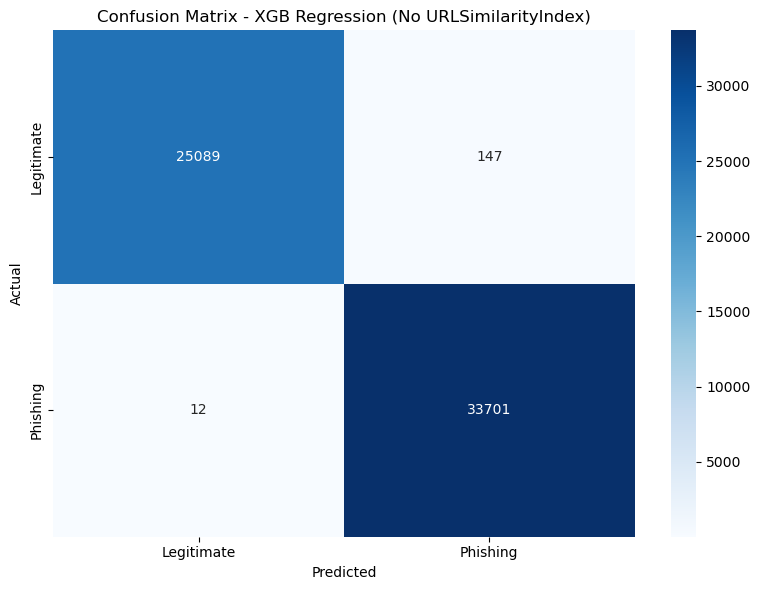

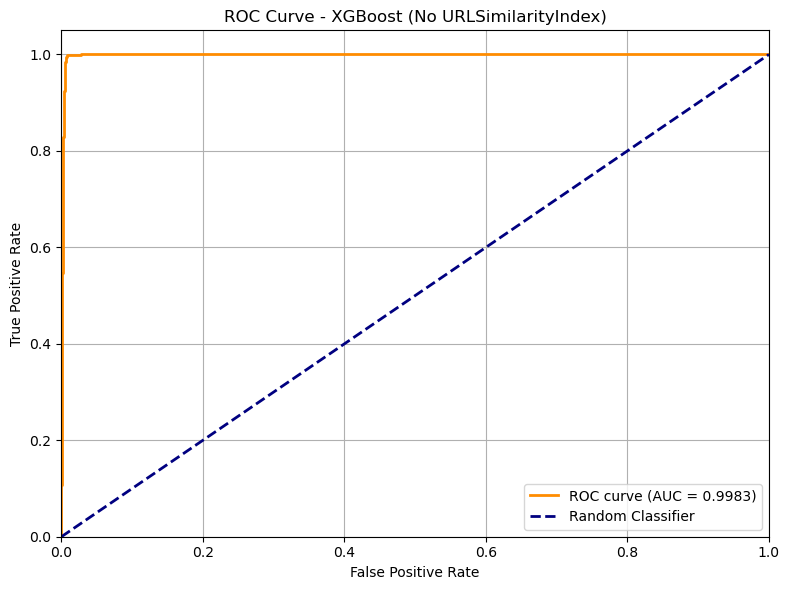

XGBOOST MODEL FEATURE IMPORTANCE ANALYSIS (WITHOUT URLSimilarityIndex)
Top 15 Most Important Features in XGBoost Model:
                   Feature  Coefficient  Abs_Coefficient
                   IsHTTPS    16.428041        16.428041
                 URLLength   -12.964430        12.964430
           NoOfDegitsInURL    -7.623626         7.623626
              DomainLength     5.532267         5.532267
          LetterRatioInURL    -5.519219         5.519219
NoOfOtherSpecialCharsInURL    -5.048507         5.048507
           DegitRatioInURL    -3.247309         3.247309
     SpacialCharRatioInURL    -2.467963         2.467963
               URLCharProb     1.070929         1.070929
             NoOfSubDomain     0.796219         0.796219
      CharContinuationRate    -0.788097         0.788097
           NoOfEqualsInURL     0.783674         0.783674
        NoOfAmpersandInURL     0.473037         0.473037
          ObfuscationRatio     0.385067         0.385067
                 TLDLengt

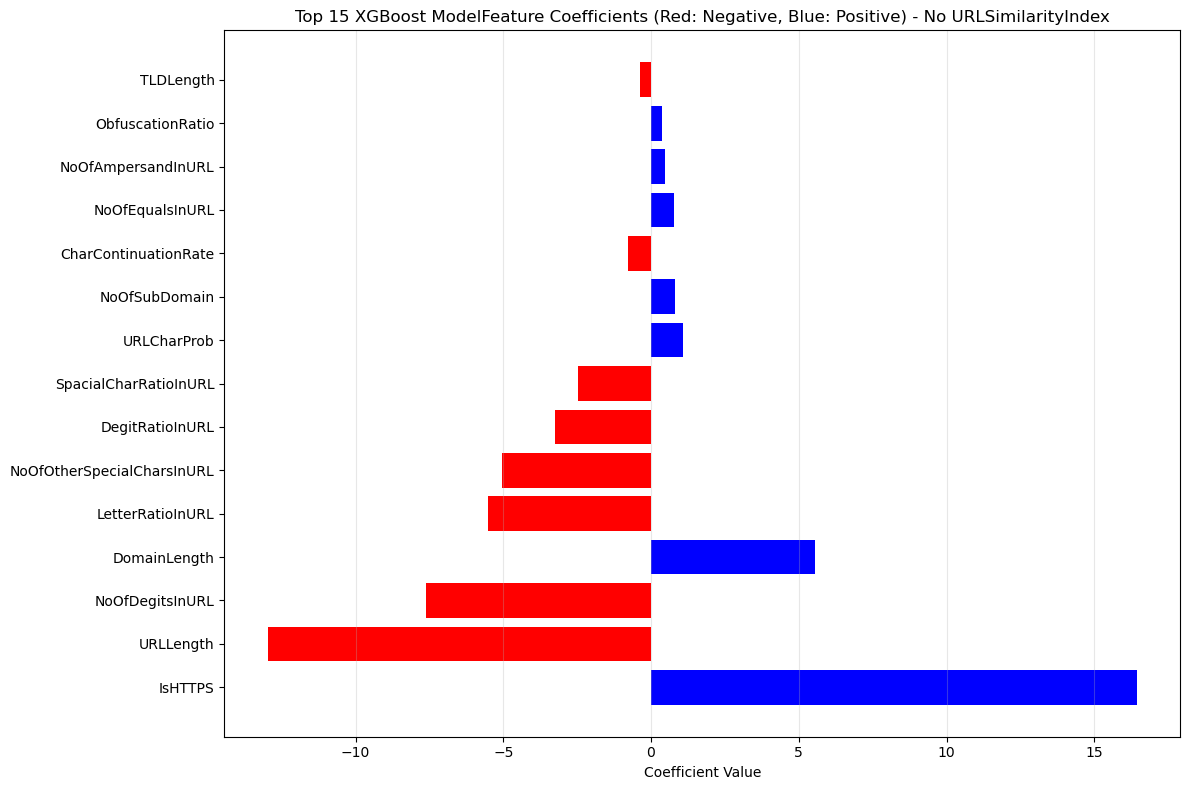

XGBoost MODEL INTERPRETATION (WITHOUT URLSimilarityIndex)
Positive coefficients: Features that increase phishing probability
Negative coefficients: Features that decrease phishing probability

Top 5 features that indicate PHISHING in XGBoost Model:
  IsHTTPS: 16.4280
  DomainLength: 5.5323
  URLCharProb: 1.0709
  NoOfSubDomain: 0.7962
  NoOfEqualsInURL: 0.7837

Top 5 features that indicate LEGITIMATE in XGBoost Model:
  URLLength: -12.9644
  NoOfDegitsInURL: -7.6236
  LetterRatioInURL: -5.5192
  NoOfOtherSpecialCharsInURL: -5.0485
  DegitRatioInURL: -3.2473
XGBoost MODEL SUMMARY (WITHOUT URLSimilarityIndex)
Total features used: 20
Training samples: 176846
Test samples: 58949
Best performance metric: AUC-ROC = 0.9983


In [24]:
# XGB Modified to exclude URLSimilarityIndex column
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Build pipeline
xgboost_model=create_model_pipeline_no_urlsim(XGBClassifier(random_state=42))

# Set up hyperparameter grid
params = {
    'model__learning_rate': Real(0.01, 0.3, prior='log-uniform'), 
    'model__max_depth': Integer(3, 10),                            
    'model__subsample': Real(0.5, 1.0),                            
    'model__colsample_bytree': Real(0.5, 1.0),                     
    'model__n_estimators': Integer(100, 500),                       
    'model__gamma': Real(0, 5)                                     
}

# Bayes Search with cross-validation
bayes_cv = BayesSearchCV(
                    estimator=xgboost_model,
                    search_spaces=[(params,30)],
                    cv=5,
                    n_iter=30,
                    n_jobs=-1,              
                    scoring='roc_auc',     
                    verbose=0,
                    random_state=42
                )
bayes_cv.fit(X_train_model, y_train_model)

best_xgb=bayes_cv.best_estimator_
best_params=bayes_cv.best_params_

# Evaluate model on test set
y_pred = best_xgb.predict(X_test_model)
y_prob = best_xgb.predict_proba(X_test_model)[:, 1]

# Basic metrics
accuracy = accuracy_score(y_test_model, y_pred)
precision = precision_score(y_test_model, y_pred)
recall = recall_score(y_test_model, y_pred)
f1 = f1_score(y_test_model, y_pred)
auc_score = roc_auc_score(y_test_model, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_score:.4f}")

print("\nDetailed Classification Report (XGB):")
print(classification_report(y_test_model, y_pred))

# Confusion Matrix
print("\nConfusion Matrix (XGB):")
cm = confusion_matrix(y_test_model, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix - XGB Regression (No URLSimilarityIndex)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_model, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (No URLSimilarityIndex)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance (Coefficients)
print("XGBOOST MODEL FEATURE IMPORTANCE ANALYSIS (WITHOUT URLSimilarityIndex)")


# Get feature names after preprocessing
feature_names = []
# Numerical features
feature_names.extend(numerical_features_no_urlsim)

# Boolean features
feature_names.extend(boolean_features)

# Get coefficients
coefficients = logistic_pipeline.named_steps['model'].coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 15 Most Important Features in XGBoost Model:")
print(feature_importance.head(15).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['red' if coef < 0 else 'blue' for coef in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 XGBoost ModelFeature Coefficients (Red: Negative, Blue: Positive) - No URLSimilarityIndex')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Model interpretation
print("XGBoost MODEL INTERPRETATION (WITHOUT URLSimilarityIndex)")
print("Positive coefficients: Features that increase phishing probability")
print("Negative coefficients: Features that decrease phishing probability")
print("\nTop 5 features that indicate PHISHING in XGBoost Model:")
phishing_indicators = feature_importance[feature_importance['Coefficient'] > 0].head()
for _, row in phishing_indicators.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

print("\nTop 5 features that indicate LEGITIMATE in XGBoost Model:")
legitimate_indicators = feature_importance[feature_importance['Coefficient'] < 0].head()
for _, row in legitimate_indicators.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")


print("XGBoost MODEL SUMMARY (WITHOUT URLSimilarityIndex)")
print(f"Total features used: {len(model_features_no_urlsim)}")
print(f"Training samples: {len(X_train_model)}")
print(f"Test samples: {len(X_test_model)}")
print(f"Best performance metric: AUC-ROC = {auc_score:.4f}")


# Random Forest

Accuracy:  0.9966
Precision: 0.9959
Recall:    0.9982
F1-Score:  0.9970
AUC-ROC:   0.9987

Detailed Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25236
           1       1.00      1.00      1.00     33713

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949


Confusion Matrix:
[[25096   140]
 [   60 33653]]


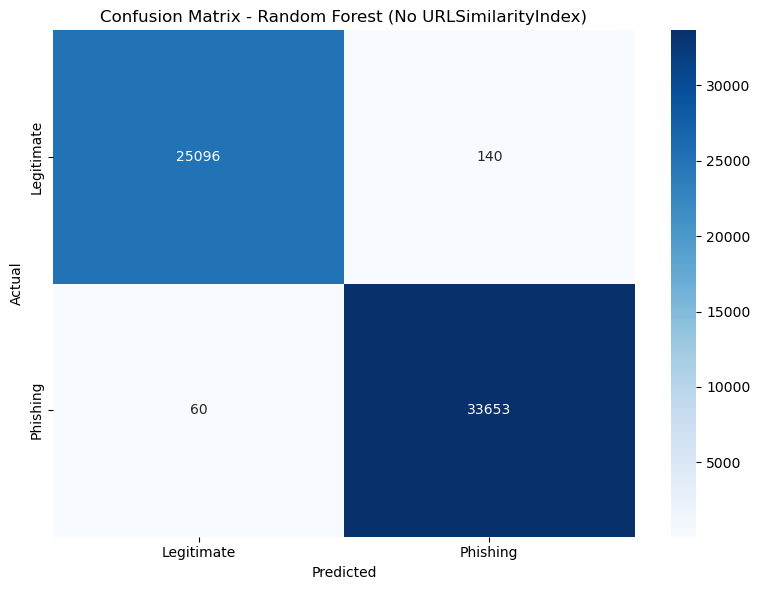

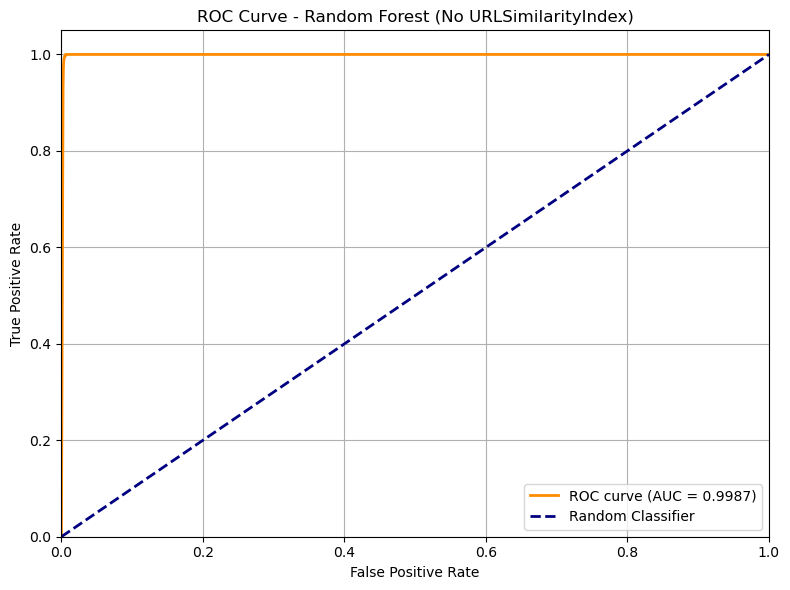

RANDOM FOREST MODEL FEATURE IMPORTANCE ANALYSIS (WITHOUT URLSimilarityIndex)
Top 15 Most Important Features in Random Forest Model:
                   Feature  Importance
                   IsHTTPS    0.380685
NoOfOtherSpecialCharsInURL    0.144459
          LetterRatioInURL    0.083708
           DegitRatioInURL    0.076957
                 URLLength    0.064643
           NoOfDegitsInURL    0.054857
     SpacialCharRatioInURL    0.052813
             NoOfSubDomain    0.039711
      CharContinuationRate    0.026168
         TLDLegitimateProb    0.025080
              DomainLength    0.021353
               URLCharProb    0.021173
                 TLDLength    0.008181
            NoOfQMarkInURL    0.000183
           NoOfEqualsInURL    0.000026


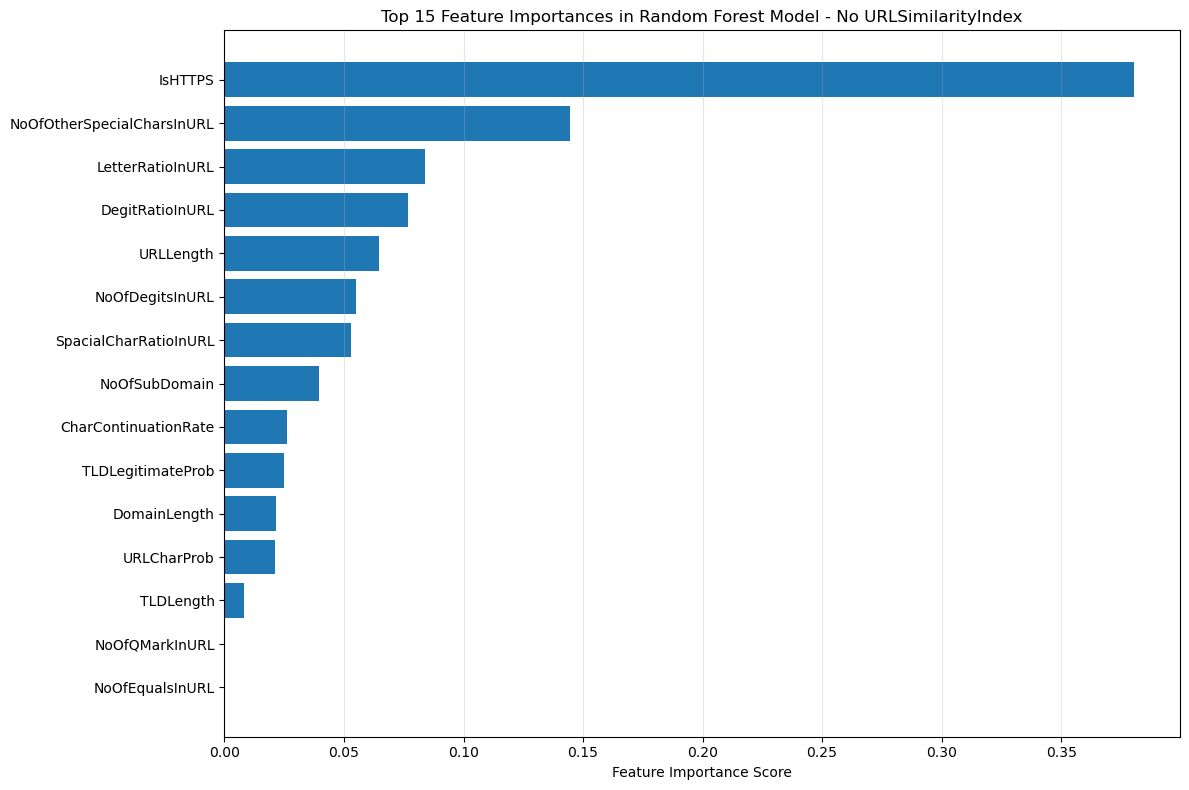

CROSS-VALIDATION RESULTS (WITHOUT URLSimilarityIndex)
5-Fold CV Accuracy: 0.9967 (+/- 0.0004)
5-Fold CV F1-Score: 0.9971 (+/- 0.0003)
5-Fold CV AUC-ROC:  0.9987 (+/- 0.0002)
RANDOM FOREST MODEL SUMMARY (WITHOUT URLSimilarityIndex)
Total features used: 20
Training samples: 176846
Test samples: 58949
Model type: Random Forest Classifier
Best performance metric: AUC-ROC = 0.9987


In [25]:
from sklearn.ensemble import RandomForestClassifier

# RANDOM FOREST MODEL (No URLSimilarityIndex)
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',  # Helpful for imbalanced data
    n_jobs=-1
)

# Create the pipeline using same preprocessing
rf_pipeline = create_model_pipeline_no_urlsim(rf_model)

# Fit the model
rf_pipeline.fit(X_train_model, y_train_model)

# Make predictions
y_pred = rf_pipeline.predict(X_test_model)
y_pred_proba = rf_pipeline.predict_proba(X_test_model)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test_model, y_pred)
precision = precision_score(y_test_model, y_pred)
recall = recall_score(y_test_model, y_pred)
f1 = f1_score(y_test_model, y_pred)
auc_score = roc_auc_score(y_test_model, y_pred_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_score:.4f}")

print("\nDetailed Classification Report (Random Forest):")
print(classification_report(y_test_model, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_model, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix - Random Forest (No URLSimilarityIndex)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_model, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (No URLSimilarityIndex)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
print("RANDOM FOREST MODEL FEATURE IMPORTANCE ANALYSIS (WITHOUT URLSimilarityIndex)")

# Get feature names from preprocessor
feature_names = []
feature_names.extend(numerical_features_no_urlsim)
feature_names.extend(boolean_features)

# Extract feature importances from the RandomForest model
importances = rf_pipeline.named_steps['model'].feature_importances_
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features in Random Forest Model:")
print(feature_importance.head(15).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance Score')
plt.title('Top 15 Feature Importances in Random Forest Model - No URLSimilarityIndex')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-validation
from sklearn.model_selection import cross_val_score
print("CROSS-VALIDATION RESULTS (WITHOUT URLSimilarityIndex)")

cv_scores = cross_val_score(rf_pipeline, X_model, y_model, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

cv_f1_scores = cross_val_score(rf_pipeline, X_model, y_model, cv=5, scoring='f1')
print(f"5-Fold CV F1-Score: {cv_f1_scores.mean():.4f} (+/- {cv_f1_scores.std() * 2:.4f})")

cv_auc_scores = cross_val_score(rf_pipeline, X_model, y_model, cv=5, scoring='roc_auc')
print(f"5-Fold CV AUC-ROC:  {cv_auc_scores.mean():.4f} (+/- {cv_auc_scores.std() * 2:.4f})")

# Summary
print("RANDOM FOREST MODEL SUMMARY (WITHOUT URLSimilarityIndex)")
print(f"Total features used: {len(model_features_no_urlsim)}")
print(f"Training samples: {len(X_train_model)}")
print(f"Test samples: {len(X_test_model)}")
print(f"Model type: Random Forest Classifier")
print(f"Best performance metric: AUC-ROC = {auc_score:.4f}")
